## Exploratory Data Analysis on Munnar Hotels

When deciding to embark on a vacation to the renowned tourist destination of 'Munnar' in Kerala, one of the challenges is selecting a suitable and budget-friendly place to stay. So, I've decided to analyze the options. Let's begin...

In [1]:
# As an initial step let's import the essential libraries
import pandas as pd
import numpy as np
#Import ploting libraries
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("munnar.csv")

In [3]:
df.head()

,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654


In [4]:
df.tail()

,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
69,The Fog Munnar (Resort & Spa),4.5,Excellent,292,5.0,Ettycity Road,city centre,13.2 km,"8,103","2,178"
70,Skylark Holidays | Rooms & Caretaker,4.1,Very Good,17,NaN,Chinnakanal,city centre,20.6 km,"3,317",684
71,Deshadan Mountain Resort- The highest resort i...,4.3,Excellent,395,4.0,Pallivasal,city centre,5.8 km,"3,953",808
72,Nature Zone Jungle Resort,4.1,Very Good,187,4.0,Pallivasal,city centre,6.6 km,"6,862","2,124"
73,Lumino Highrange Homestay | Room & Guided Treks,3.2,Good,221,NaN,Moolakadai,Attukal Waterfalls,1.3 km,"1,014",223


Here are the few questions I need to address:

### Data Quality:

1. Missing Values: Are there any missing values in the dataset? If so, how prevalent are they and for which features?
2. Outliers: Are there any outliers in the data (e.g., extremely high or low prices)?
3. Rating Inconsistencies: Is there any inconsistency between the numerical rating and the text description (e.g., a 5-star hotel with a "poor" description)?

### General Trends:
1. Price Distribution: How are the prices of hotels distributed? Are there any outliers?
2. Star Rating vs. Price: Is there a correlation between the star rating of a hotel and its price?
3. Location vs. Price: Do hotels in certain locations tend to be more expensive?
4. Reviews: How many reviews do hotels typically have? Is there a correlation between the number of reviews and the rating of the hotel?
5. Tax Analysis: How does the tax vary across hotels? Are there any patterns?
6. Popular Landmarks: Which landmarks are most frequently mentioned in the "Nearest Landmark" feature?

In [5]:
df.shape

(74, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name									   74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     object 
 9   Tax                   72 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.9+ KB


In [7]:
df.describe()

,Rating,Reviews,Star Rating
count,74.000000,74.000000,57.000000
mean,4.068919,375.810811,3.912281
std,0.401001,383.407208,0.808011
min,2.800000,6.000000,2.000000
25%,3.900000,112.250000,3.000000
50%,4.100000,240.500000,4.000000
75%,4.300000,437.000000,5.000000
max,4.800000,1934.000000,5.000000


## 1. Missing Values: Are there any missing values in the dataset? If so, how prevalent are they and for which features?

In [8]:
# Missing Values check
df.isnull().sum()

Hotel Name\t\t\t\t\t\t\t\t\t     0
Rating                           0
Rating Description               0
Reviews                          0
Star Rating                     17
Location                         0
Nearest Landmark                 0
Distance to Landmark             0
Price                            0
Tax                              2
dtype: int64

Here there are 17 missing values in the star rating whereas rating has no null values. We can't drop this 17 values simply since there are only 74 hotels in total. So the best way is to replace the missing values with mean.

In [9]:
df["Star Rating"].fillna(value=df["Star Rating"].mean(),inplace=True)

Similarly I need to replace missing value associated with Tax as well, but tax is given as object data type. So I am going to convert it into int.

In [10]:
 #removes all commas at once in a column
df["Price"] = df["Price"].str.replace(",","")
df["Tax"] = df["Tax"].str.replace(",","")

In [11]:
#filling nan with mean value
df["Tax"].fillna(value="0",inplace=True)
df = df.astype({'Tax':'int'})
df.replace([0],df["Tax"].mean(),inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name									   74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           74 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     object 
 9   Tax                   74 non-null     float64
dtypes: float64(3), int64(1), object(6)
memory usage: 5.9+ KB


## 2. Outliers: Are there any outliers in the data (e.g., extremely high or low prices)?

In [13]:
#df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.astype({'Price':'int'})

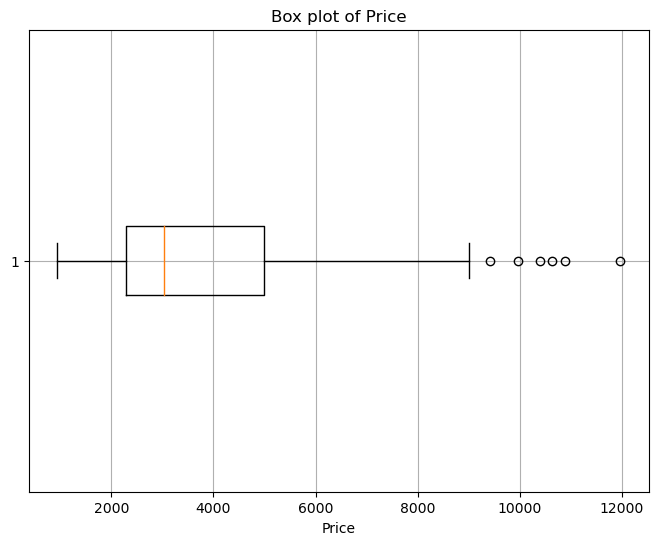

In [14]:
# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'], vert=False)
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.grid(True)
plt.show()

Box plot is the best way to find the outliers.The box plot will display the distribution of the 'Price' column and any potential outliers as points outside the whiskers. As we can see there are few hotels with high pay rate.

## 3. Rating Inconsistencies: Is there any inconsistency between the numerical rating and the text description (e.g., a 5-star hotel with a "poor" description)?

To check for inconsistencies between numerical ratings and text descriptions in a dataset, we can follow these steps:

1. Extract Numerical Ratings and Text Descriptions: If dataset contains both numerical ratings and text descriptions, extract these two columns.
2. Analyze the Relationship: Compare the numerical ratings with the text descriptions to see if they match. We can do this by calculating summary statistics (e.g., mean, median) for numerical ratings and examining the corresponding text descriptions.

In [15]:
# Step 1: Extract numerical ratings and text descriptions
numerical_ratings = df['Rating']
text_descriptions = df['Rating Description']

In [16]:
# Step 2: Analyze the relationship
# Example: Calculate mean numerical rating and examine corresponding text descriptions
mean_rating = numerical_ratings.mean()
print("Mean numerical rating:", mean_rating)

mean_rating_rounded = round(mean_rating)

corresponding_text_descriptions = text_descriptions[df['Rating'] == mean_rating_rounded]
print("Text descriptions for mean rating:", corresponding_text_descriptions)

Mean numerical rating: 4.06891891891892
Text descriptions for mean rating: 8     Very Good
28    Very Good
44    Very Good
55    Very Good
Name: Rating Description, dtype: object


Since for rating equals '4' we are getting a description of 'Very Good' proves that there are no inconsistencies involved.

## 4. Price Distribution: How are the prices of hotels distributed? Are there any outliers?

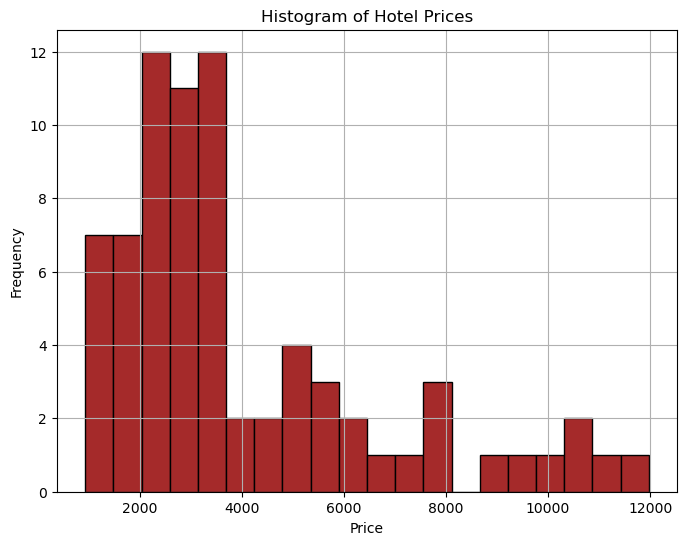

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=20, color='brown', edgecolor='black')
plt.title('Histogram of Hotel Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The distribution of hotel prices appears to be positively skewed, it suggests that most hotel prices are clustered towards the lower end of the price range, with fewer hotels having higher prices. 

## 5. Star Rating vs. Price: Is there a correlation between the star rating of a hotel and its price?

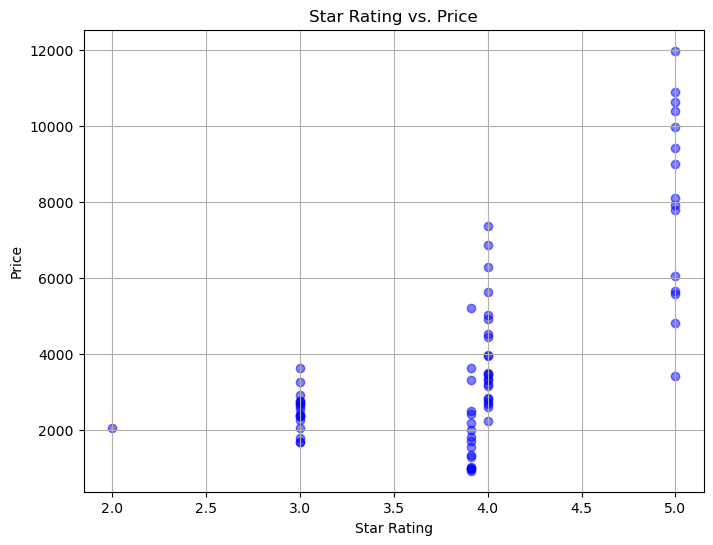

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter( df['Star Rating'], df['Price'], color='blue', alpha=0.5)
plt.title('Star Rating vs. Price')
plt.xlabel('Star Rating')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Axes: xlabel='Star Rating', ylabel='Count'>

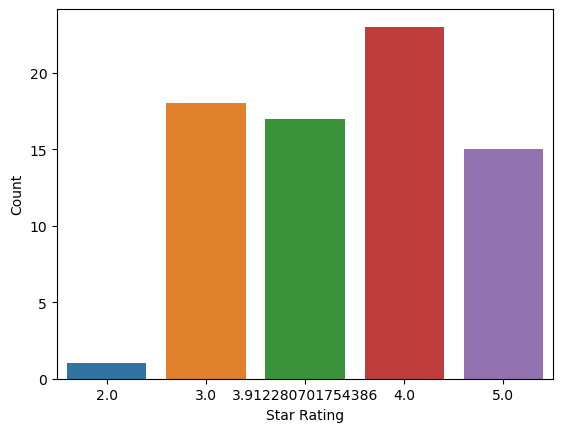

In [20]:
import seaborn as sns
df_sr = df.groupby('Star Rating').size().reset_index().rename(columns={0:"Count"})
sns.barplot(x='Star Rating',y='Count',data=df_sr)

What you can infer from this plot is same rating has multiple pay range. So rating and price is not directly related. Even though 5 rating hotels are available for 3k and 12k

## 6. Location vs. Price: Do hotels in certain locations tend to be more expensive?

In [21]:
df['Location'].unique()

array(['Chithirapuram ', 'Chinnakanal ', 'Central Munnar ', 'Pallivasal ',
       'Moolakadai ', 'Laxmi Estate ', 'Near Munnar Bus Stand ',
       'Muthirapuzhayar Road ', 'Anachal ', 'Ettycity Road ', 'Adimali ',
       'Munnar ', 'Near Pothamedu Viewpoint ', 'Muthuvaankudi ',
       'Ambazhachal ', 'Periyakanal-Muttukad Road ', 'Devikulam ',
       'Bison Valley ', 'Pottankadu ', 'Suryanelli ', 'Mankulam ',
       'Kallar Vattiyar '], dtype=object)

In [22]:
df_loc_price = df.groupby('Location')['Price'].mean().reset_index()
df_loc_price = df_loc_price.astype({'Price':'int'})
df_loc_price.head()

,Location,Price
0,Adimali,2248
1,Ambazhachal,2832
2,Anachal,4835
3,Bison Valley,2011
4,Central Munnar,2422


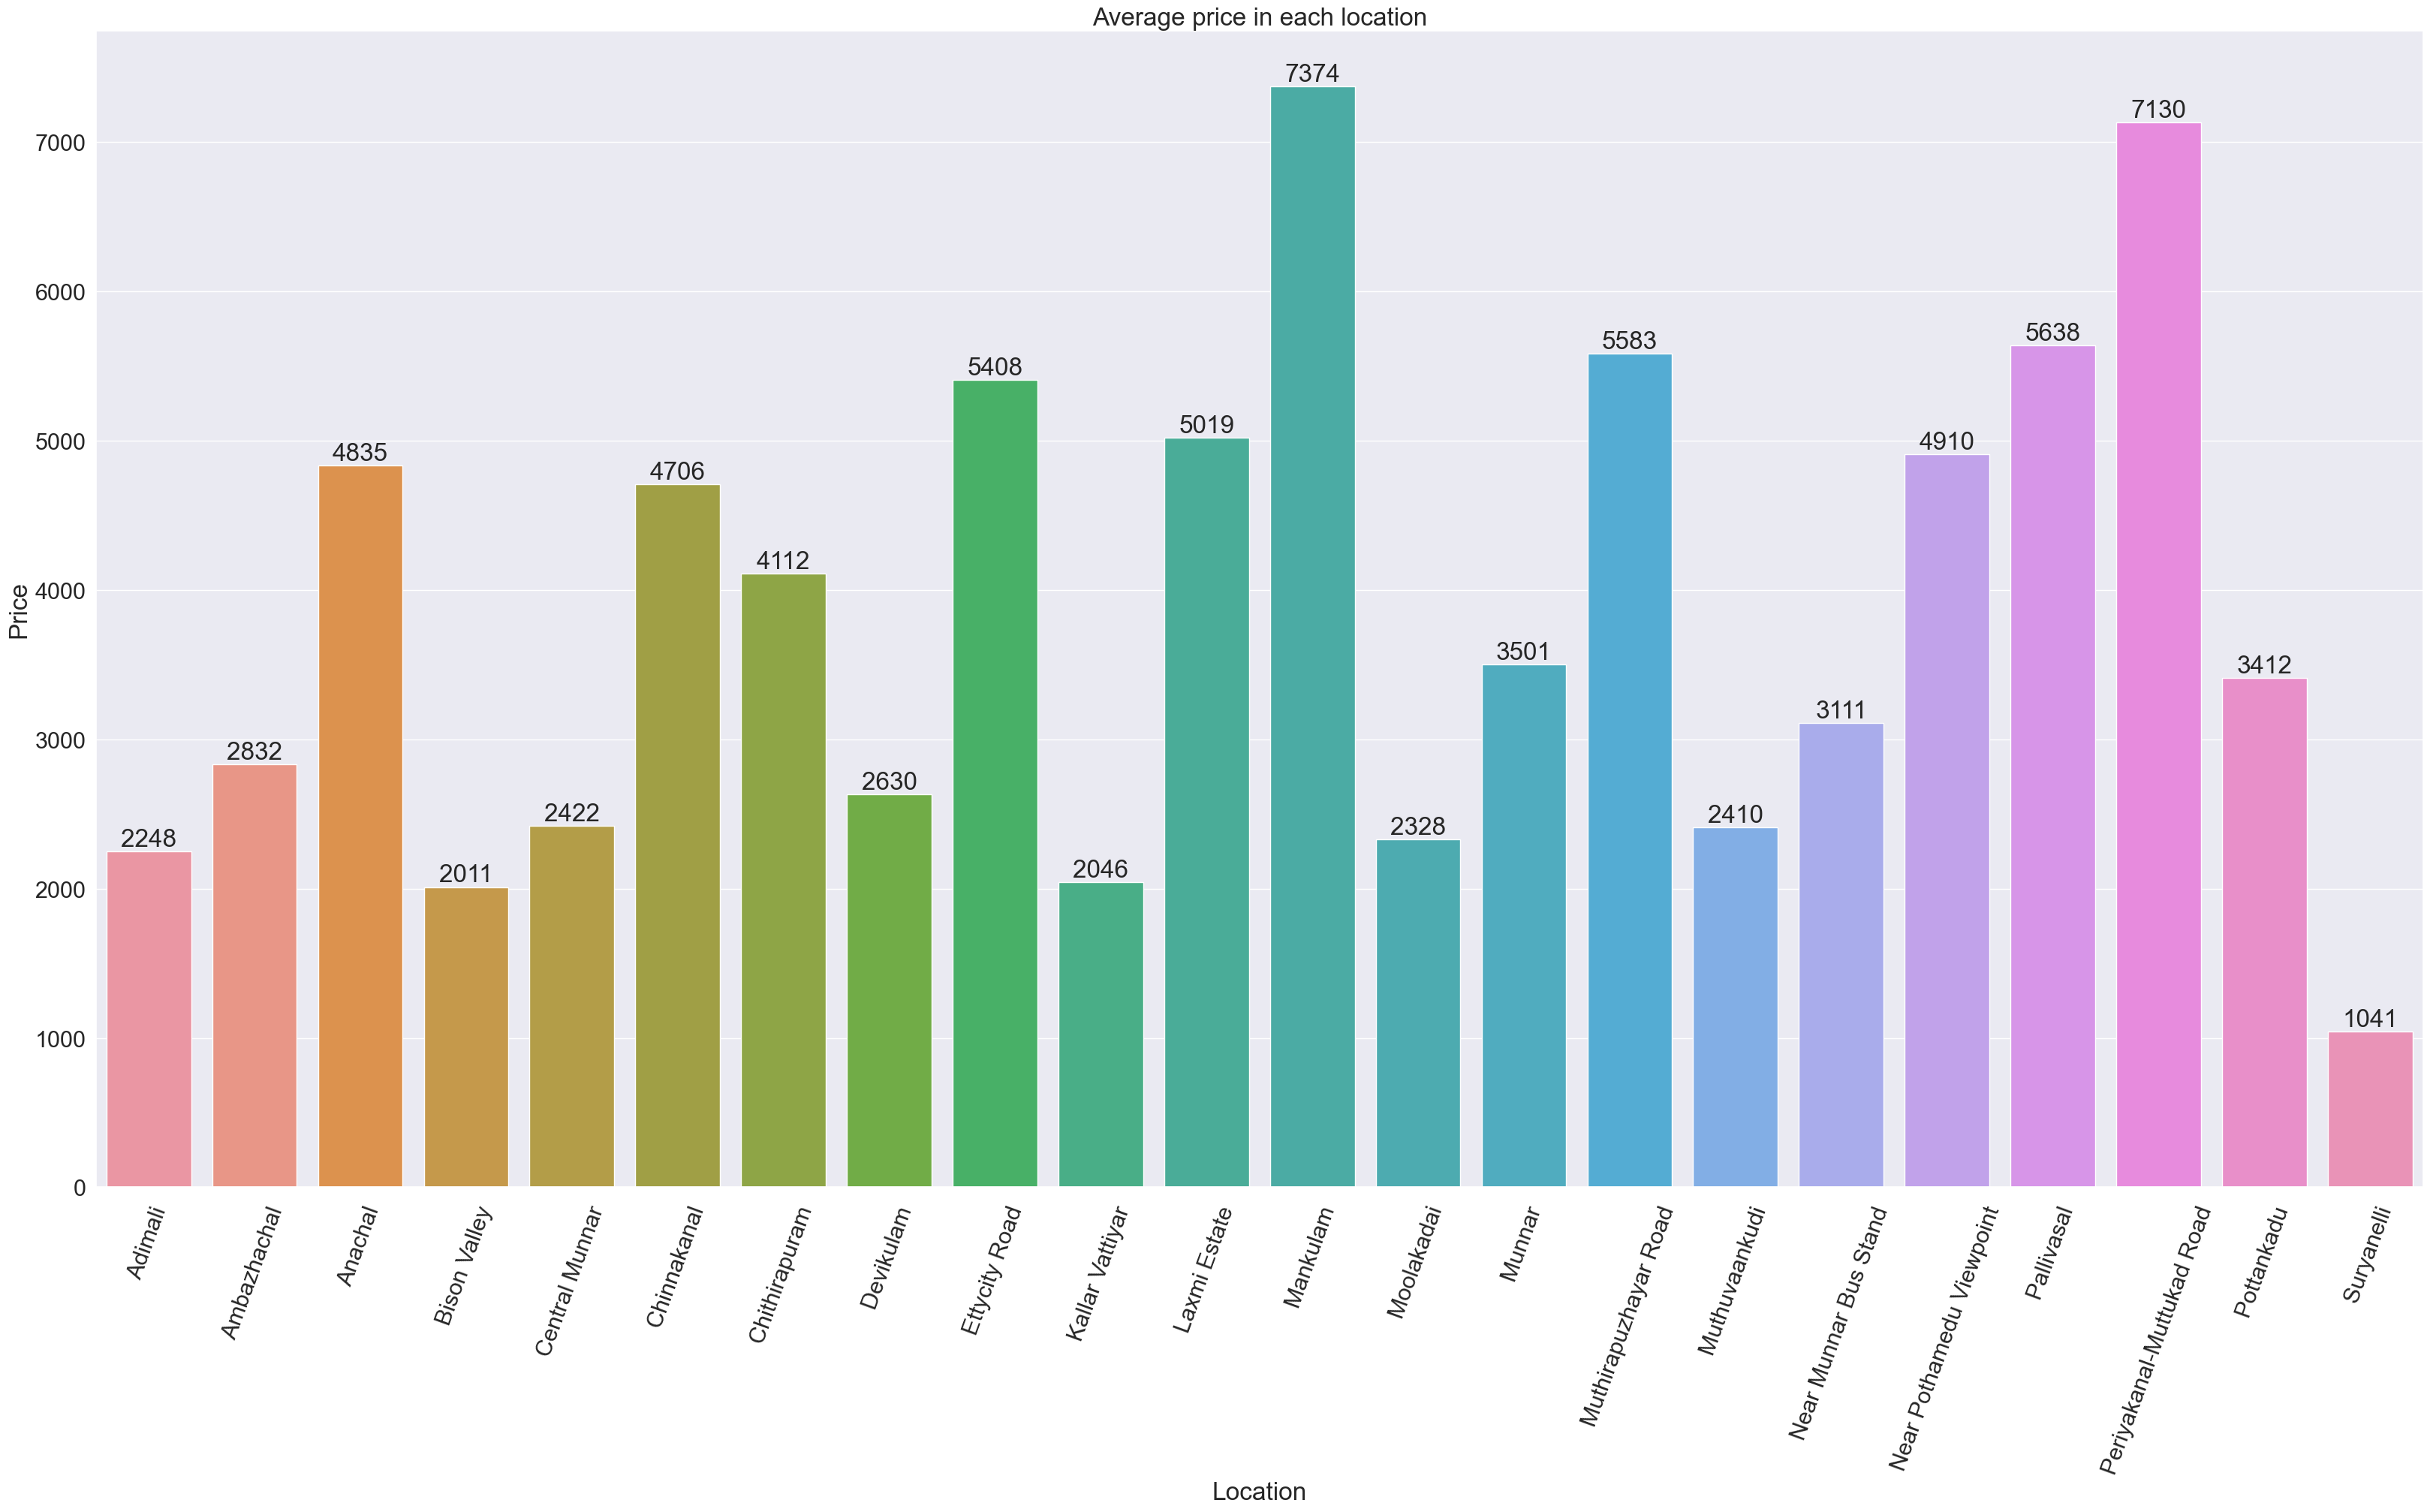

In [24]:
plt.figure(figsize=(40, 20))

# Plot the barplot
plt.title("Average price in each location")
p = sns.barplot(x='Location', y='Price', data=df_loc_price)

# Add labels to the bars
p.bar_label(p.containers[0])

# Rotate x-axis labels
p.set_xticklabels(labels=df_loc_price['Location'], rotation=70)

# Show the plot
plt.show()

# Reset font scale
sns.set(font_scale=2)

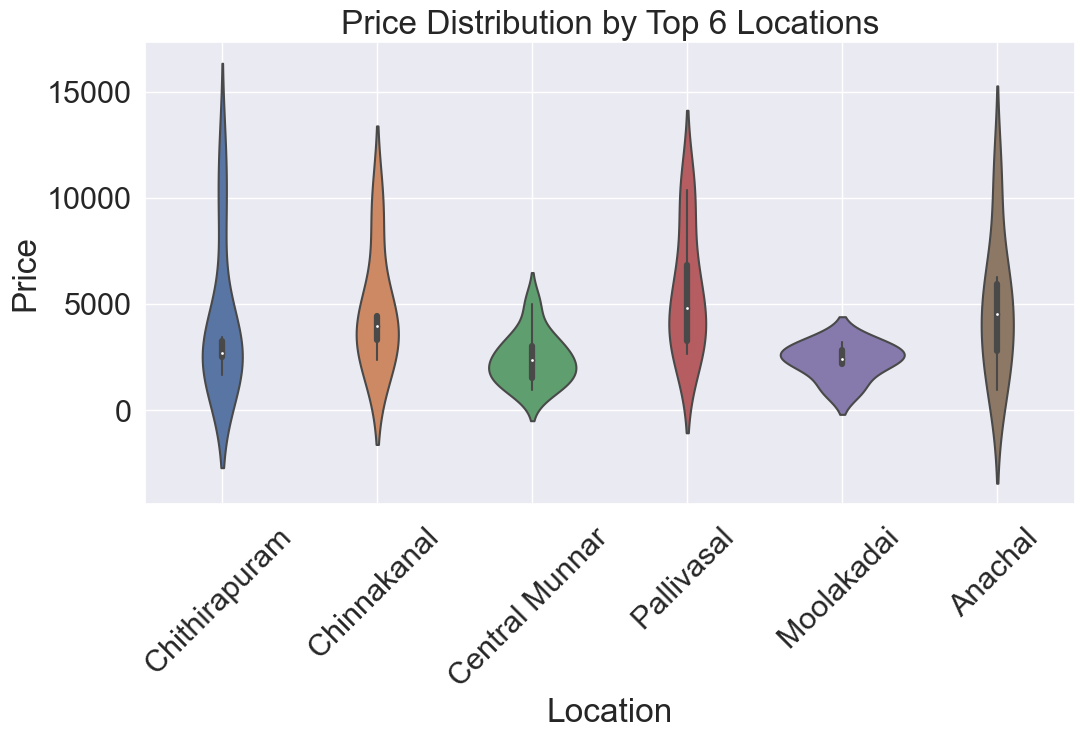

In [27]:
N=6
# Select the top N most common locations
top_locations = df['Location'].value_counts().nlargest(N).index

# Filter the DataFrame to include only data for the top N locations
df_top_locations = df[df['Location'].isin(top_locations)]

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Location', y='Price', data=df_top_locations)
plt.title('Price Distribution by Top {} Locations'.format(N))
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

Relevant information from a violin plot:

**Central Tendency:** We can determine the central tendency of the data by looking at the position of the median line within each violin.

**Variability:** The width of the violins and the spread of the KDE curve provide insights into the variability of the data. Wider sections indicate higher variability, while narrower sections indicate lower variability.

**Outliers:** Outliers can be identified as individual data points beyond the whiskers of the box plot elements.

**Comparison:** We can compare the shapes and positions of the violins across different categories or groups to identify patterns or differences in the data distribution.

**Probability Density:** The violin plot provides a visual representation of the probability density of the data at different values, allowing you to assess the likelihood of observing certain values.

## 7.Reviews: How many reviews do hotels typically have? Is there a correlation between the number of reviews and the rating of the hotel?

Mean reviews: 375.81081081081084
Median reviews: 240.5
Standard deviation of reviews: 383.4072078154152


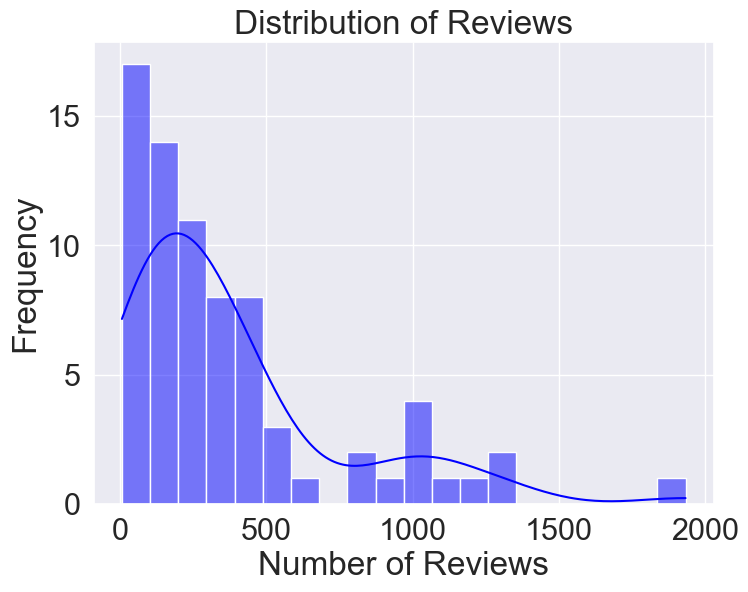

In [28]:
# Step 1: Calculate summary statistics
mean_reviews = df['Reviews'].mean()
median_reviews = df['Reviews'].median()
std_reviews = df['Reviews'].std()

print("Mean reviews:", mean_reviews)
print("Median reviews:", median_reviews)
print("Standard deviation of reviews:", std_reviews)

# Step 2: Visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Reviews'], bins=20, kde=True, color='blue')
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Correlation coefficient: 0.1602321107687365
P-value: 0.1726519427252138


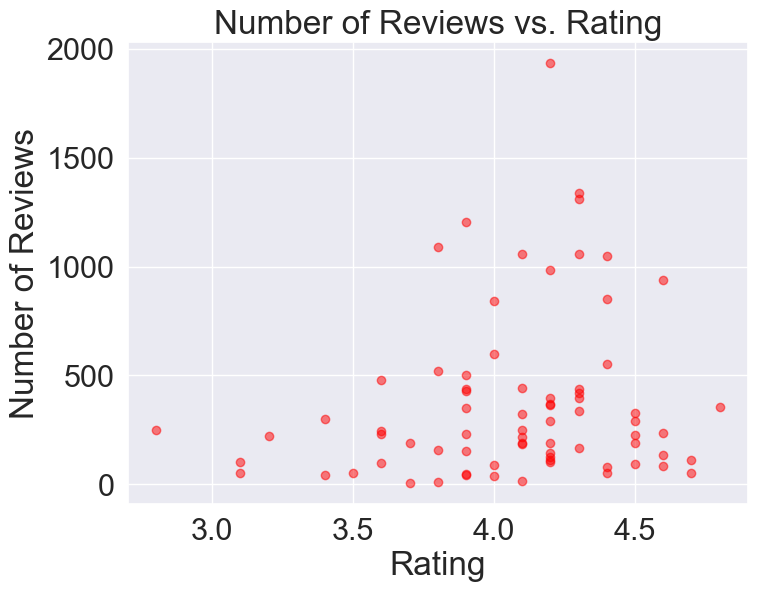

In [29]:
from scipy.stats import pearsonr
# Step 3: Correlation analysis
correlation_coefficient, p_value = pearsonr(df['Rating'], df['Reviews'])
print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Step 4: Visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter( df['Rating'],df['Reviews'], color='red', alpha=0.5)
plt.title('Number of Reviews vs. Rating')
plt.ylabel('Number of Reviews')
plt.xlabel('Rating')
plt.grid(True)
plt.show()

## 8. Tax Analysis: How does the tax vary across hotels? Are there any patterns?

Mean tax: 953.4835646457268
Median tax: 688.5
Standard deviation of tax: 786.2622589953693


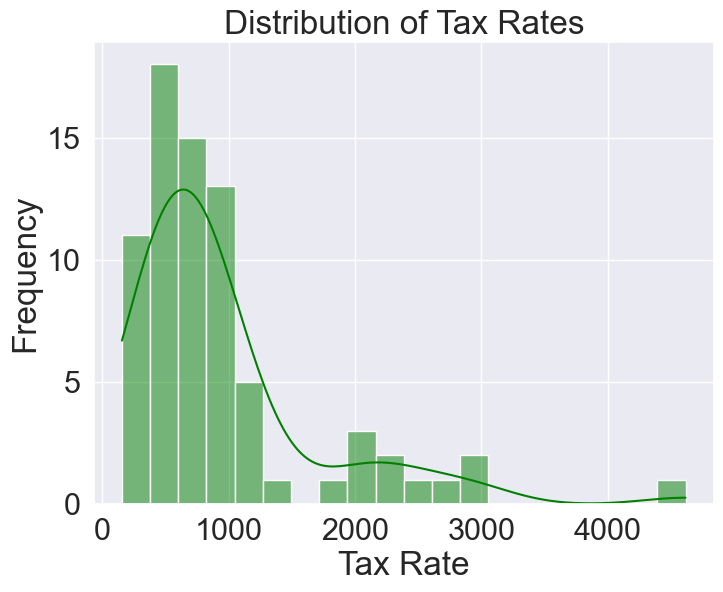

In [30]:
# Step 1: Calculate summary statistics
mean_tax = df['Tax'].mean()
median_tax = df['Tax'].median()
std_tax = df['Tax'].std()

print("Mean tax:", mean_tax)
print("Median tax:", median_tax)
print("Standard deviation of tax:", std_tax)

# Step 2: Visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Tax'], bins=20, kde=True, color='green')
plt.title('Distribution of Tax Rates')
plt.xlabel('Tax Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Analyzing the positively skewed distribution may reveal patterns or trends related to hotel characteristics (e.g., location, star rating) or external factors (e.g., government policies, economic conditions) that influence tax rates.

## 9. Popular Landmarks: Which landmarks are most frequently mentioned in the "Nearest Landmark" feature?

In [31]:
df['Nearest Landmark'].unique()

array(['city centre', 'Attukal Waterfalls'], dtype=object)

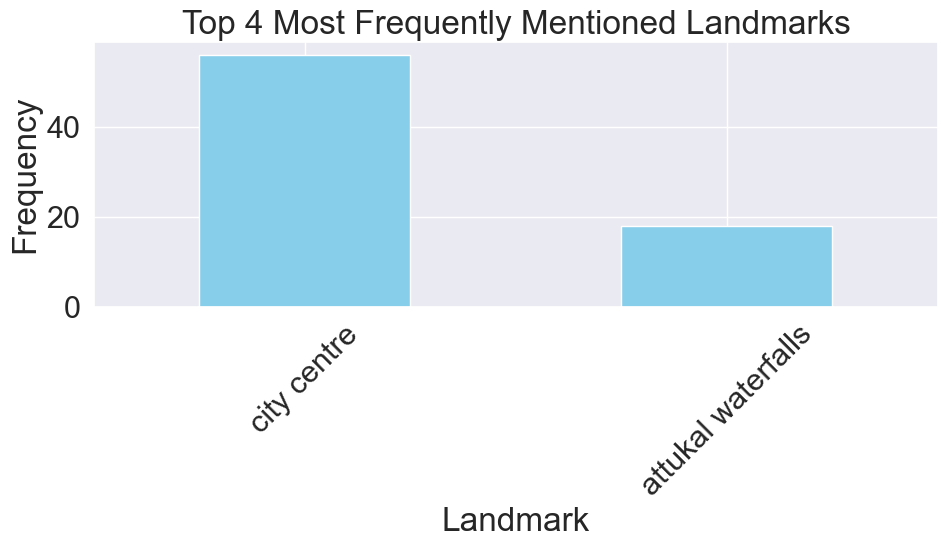

In [32]:
# Step 1: Extract landmark data
landmark_data = df['Nearest Landmark']
N=4
# Step 2: Preprocess data
landmark_data_cleaned = landmark_data.str.lower()  # Convert to lowercase for consistency
# Additional preprocessing steps (e.g., remove punctuation, special characters) as needed

# Step 3: Count frequencies
landmark_frequencies = landmark_data_cleaned.value_counts()

# Step 4: Identify top landmarks
top_n_landmarks = landmark_frequencies.nlargest(N)

# Step 5: Visualize results
plt.figure(figsize=(10, 6))
top_n_landmarks.plot(kind='bar', color='skyblue')
plt.title('Top {} Most Frequently Mentioned Landmarks'.format(N))
plt.xlabel('Landmark')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

## 10. Hotels and Ratings

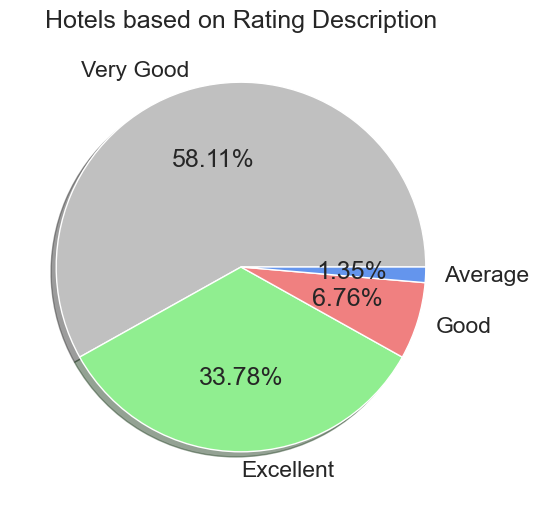

In [33]:
# Set font scale and figure size
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 6))

# Get rating description counts
r_desc_counts = df['Rating Description'].value_counts()

# Define custom colors
custom_colors = ['silver', 'lightgreen', 'lightcoral', 'cornflowerblue']
# Plot pie chart with custom colors
plt.pie(r_desc_counts, labels=r_desc_counts.index, autopct="%1.2f%%", colors=custom_colors, shadow=True)
plt.title("Hotels based on Rating Description")
plt.show()

This concludes the queries related to Munnar data.